# Spectral Clustering - Moon
- 2018/07/02 ~ 2018/07/06

## References
- https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
- http://bcho.tistory.com/1203
- https://github.com/Rabierre/deep-learning/blob/master/8th-week/codes/spectral_clustering.ipynb

## Step0. 달 모양 데이터 생성하기

In [72]:
from sklearn.datasets import make_moons
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

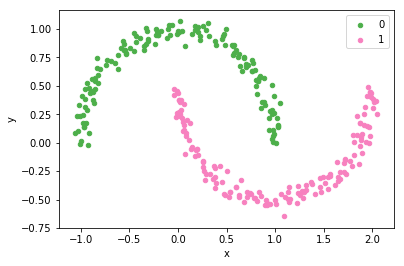

In [1233]:
# 달 모양 데이터 만들기
X, y = make_moons(n_samples=300, noise=0.05)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = np.array(list(islice(cycle(['#4daf4a','#f781bf', '#a65628', '#984ea3']),int(max(labels) + 1))))

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [1234]:
len(df)

300

In [1235]:
df.head()

,label,x,y
0,1,0.835500,-0.438042
1,1,1.897383,0.072075
2,0,-0.965344,0.136654
3,0,-0.348055,0.814488
4,1,-0.016652,0.225115


In [1236]:
X[:3]

array([[ 0.83549951, -0.43804154],
       [ 1.89738336,  0.07207548],
       [-0.96534378,  0.13665415]])

## Step1. Gaussian Kernel을 통해 pairwise matrix를 만든다

In [1237]:
from itertools import cycle, islice

In [1238]:
def GaussianMatrix(X,alpha):
    row,col=X.shape
    GassMatrix=np.zeros(shape=(row,row))
    X=np.asarray(X)
    i=0
    for v_i in X:
        j=0
        for v_j in X:
            GassMatrix[i,j]=Gaussian(v_i.T,v_j.T,alpha)
            j+=1
        i+=1
    return GassMatrix
def Gaussian(x,z,alpha):
    return np.exp((-(np.linalg.norm(x-z)))/(alpha))

In [1239]:
X_G = GaussianMatrix(X,alpha = 0.1)

In [1240]:
X_G[:1,1:] = -np.sort(-X_G[:1,1:])
X_G[:1, :10]

array([[1.        , 0.67515603, 0.50493577, 0.48818739, 0.46157636,
        0.42062405, 0.40345064, 0.38127957, 0.29390717, 0.28673814]])

- alpha 값이 커질수록 Similarity 계산 값은 1에 가까워짐
- 가장 값이 큰 두 값을 제외하고 나머지는 0으로 만들어야 함

## Step2. Laplacian Matrix(=Degree Matrix - Adjacency Matrix)를 만든다

In [1241]:
def AdjacencyMatrix(S, k_neighboors):
    N = len(S)
    A = np.zeros((N, N))
    for i in range(N):
        best = np.sort(S[i])[::-1][0:k_neighboors]
        for s in best:
            j = S[i].tolist().index(s)
            A[i][j] = S[i][j]
            A[j][i] = S[i][j]
    return A

In [1242]:
A = AdjacencyMatrix(X_G,30)

In [1243]:
A[:1,:]

array([[1.        , 0.67515603, 0.50493577, 0.48818739, 0.46157636,
        0.42062405, 0.40345064, 0.38127957, 0.29390717, 0.28673814,
        0.28299201, 0.38127957, 0.26507843, 0.22618969, 0.17408638,
        0.16880021, 0.138291  , 0.12997056, 0.12179358, 0.11086978,
        0.10346307, 0.08750079, 0.08505501, 0.06929086, 0.28299201,
        0.04957738, 0.0492952 , 0.04686596, 0.04457584, 0.04208316,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48818739, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [1244]:
def DegreeMatrix(A):
    D = np.zeros(A.shape)
    for i in range(A.shape[0]):
        D[i,i] = np.sum(A[i,:])
    return D

In [1245]:
D = DegreeMatrix(A)
D[:3,:3]

array([[13.55535395,  0.        ,  0.        ],
       [ 0.        ,  9.41186961,  0.        ],
       [ 0.        ,  0.        ,  7.95777351]])

In [1246]:
L = D - A
L[:1,]

array([[ 1.25553540e+01, -6.75156032e-01, -5.04935769e-01,
        -4.88187394e-01, -4.61576360e-01, -4.20624051e-01,
        -4.03450639e-01, -3.81279570e-01, -2.93907168e-01,
        -2.86738140e-01, -2.82992005e-01, -3.81279570e-01,
        -2.65078430e-01, -2.26189685e-01, -1.74086380e-01,
        -1.68800209e-01, -1.38290995e-01, -1.29970564e-01,
        -1.21793584e-01, -1.10869783e-01, -1.03463074e-01,
        -8.75007946e-02, -8.50550146e-02, -6.92908584e-02,
        -2.82992005e-01, -4.95773766e-02, -4.92951969e-02,
        -4.68659554e-02, -4.45758411e-02, -4.20831646e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.88187394e-0

In [1247]:
from numpy.linalg import svd

## Step3. SVD를 통해 가장 작은 고유벡터 2개을 찾는다

In [1248]:
U, Sigma, V_t = svd(L)

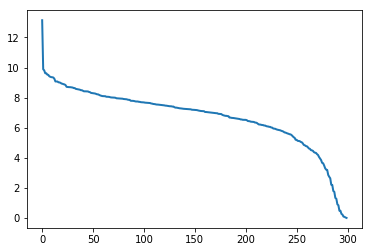

In [1249]:
plt.plot(Sigma, label='line 1', linewidth=2)
plt.show()

In [1250]:
Sigma[290:300]

array([9.07613582e-01, 8.39294279e-01, 4.80780934e-01, 4.77193999e-01,
       2.69487326e-01, 2.20607442e-01, 8.69378546e-02, 6.99549078e-02,
       2.81702414e-02, 4.64148273e-16])

In [1251]:
PC2 = U[:,298:300]
PC2

array([[ 0.03212303,  0.05773503],
       [ 0.06237157,  0.05773503],
       [-0.03080616,  0.05773503],
       [-0.04044467,  0.05773503],
       [ 0.05295368,  0.05773503],
       [ 0.06022202,  0.05773503],
       [ 0.06235285,  0.05773503],
       [-0.03654758,  0.05773503],
       [-0.0498849 ,  0.05773503],
       [ 0.05349867,  0.05773503],
       [ 0.05364907,  0.05773503],
       [ 0.04839999,  0.05773503],
       [ 0.06104337,  0.05773503],
       [-0.03444186,  0.05773503],
       [ 0.05081272,  0.05773503],
       [ 0.05796004,  0.05773503],
       [-0.03866098,  0.05773503],
       [ 0.05193251,  0.05773503],
       [-0.07352416,  0.05773503],
       [ 0.05397964,  0.05773503],
       [ 0.0616428 ,  0.05773503],
       [-0.04549636,  0.05773503],
       [-0.07419993,  0.05773503],
       [-0.06210602,  0.05773503],
       [ 0.04856693,  0.05773503],
       [-0.07576761,  0.05773503],
       [ 0.05481208,  0.05773503],
       [-0.03573279,  0.05773503],
       [-0.07550993,

## Step4. 2개의 주성분에 Step1의 데이터를 투영한다

In [1264]:
Projected_X_G_2D = PC2.T.dot(X_G.T)
DataFrame(Projected_X_G_2D.T).head()

,0,1
0,0.131856,0.458423
1,0.573790,0.514388
2,-0.262266,0.433038
3,-0.343994,0.440974
4,0.468527,0.506303


In [1253]:
Projected_X_G_2D.shape

(2, 300)

In [1254]:
Projected_X_G_2D[0:1,].shape

(1, 300)

In [1255]:
Projected_X_G_2D[1:2,].shape

(1, 300)

In [1256]:
Projected_X_G_2D[:,0]

array([0.13185568, 0.45842254])

In [1257]:
Projected_X_G_2D[:,0:1]

array([[0.13185568],
       [0.45842254]])

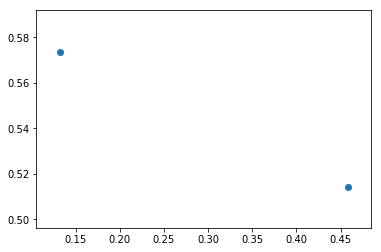

In [1258]:
plt.scatter(Projected_X_G_2D[:,0:1], Projected_X_G_2D[:,1:2])
plt.show()

## Step5. 투영한 데이터를 K-Means를 통해 클러스터링 하고, 레이블을 붙인다

In [1259]:
labels = KMeans(n_clusters=2, n_init=37, random_state=30).fit(Projected_X_G_2D.T).labels_

In [1260]:
labels.shape

(300,)

In [1261]:
X.shape

(300, 2)

In [1262]:
labels

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

## Step6. 그려본다!

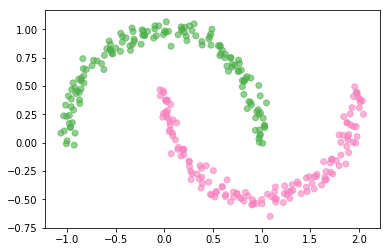

In [1263]:
plt.scatter(X[:, 0], X[:, 1],  color=colors[labels], alpha=0.6)
plt.show()